In [3]:
import pandas as pd

In [4]:
weather = pd.read_csv("3421667.csv", index_col="DATE")

In [7]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.503615
ACSH       0.503529
AWND       0.377378
FMTM       0.562236
PGTM       0.374193
PRCP       0.000000
PSUN       0.701343
SNOW       0.380219
SNWD       0.382973
TAVG       0.722304
TMAX       0.000000
TMIN       0.000000
TSUN       0.450891
WDF1       0.998709
WDF2       0.573857
WDF5       0.578204
WDFG       0.582035
WDFM       0.530300
WESD       0.748472
WSF1       0.998709
WSF2       0.573857
WSF5       0.578204
WSFG       0.581992
WSFM       0.530257
WT01       0.696651
WT02       0.959413
WT03       0.991392
WT04       0.999785
WT05       0.994491
WT07       0.986614
WT08       0.613411
WT09       0.998106
WT10       0.999742
WT11       0.999957
WT13       0.903547
WT14       0.984419
WT16       0.843376
WT18       0.999957
WT21       0.999527
WT22       0.999957
WV01       0.997891
dtype: float64

In [8]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [9]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [10]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.03,0.0,0.0,56,42
1960-01-02,0.00,0.0,0.0,58,38
1960-01-03,0.00,0.0,0.0,59,38
1960-01-04,0.00,0.0,0.0,63,45
1960-01-05,0.00,0.0,0.0,63,40
...,...,...,...,...,...
2023-08-07,0.00,NaN,NaN,80,64
2023-08-08,0.00,NaN,NaN,83,69
2023-08-09,0.00,NaN,NaN,78,70


In [11]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000000
snow          0.380219
snow_depth    0.382973
temp_max      0.000000
temp_min      0.000000
dtype: float64

In [12]:
core_weather["snow"].value_counts()

0.0    14400
Name: snow, dtype: int64

In [13]:
del core_weather["snow"]

In [14]:
core_weather["snow_depth"].value_counts()

0.0    14336
Name: snow_depth, dtype: int64

In [15]:
del core_weather["snow_depth"]

In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [18]:
core_weather.dtypes

precip      float64
temp_max      int64
temp_min      int64
dtype: object

In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06',
       '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11'],
      dtype='object', name='DATE', length=23234)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05',
               '2023-08-06', '2023-08-07', '2023-08-08', '2023-08-09',
               '2023-08-10', '2023-08-11'],
              dtype='datetime64[ns]', name='DATE', length=23234, freq=None)

In [23]:
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='DATE', length=23234)

In [24]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='DATE'>

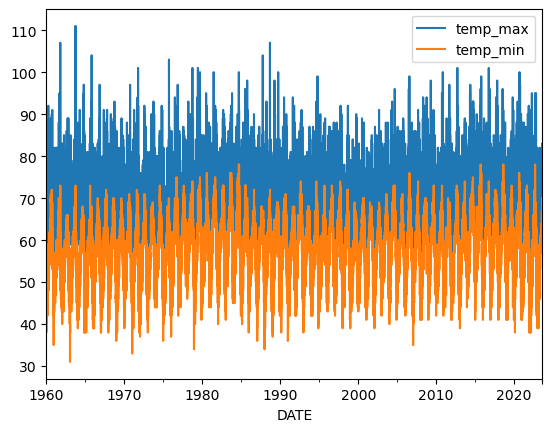

In [25]:
core_weather[["temp_max", "temp_min"]].plot()

In [26]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2019    365
2020    366
2021    365
2022    365
2023    223
Name: DATE, Length: 64, dtype: int64

<Axes: xlabel='DATE'>

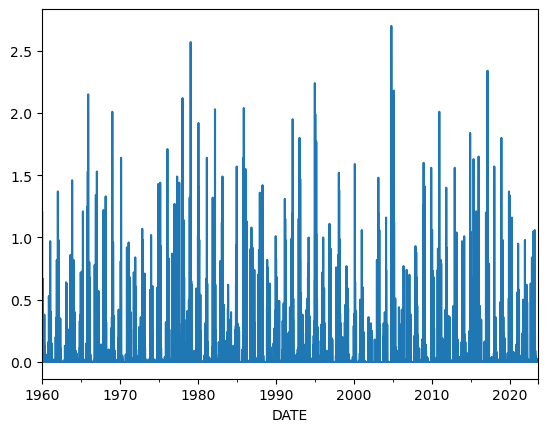

In [27]:
core_weather["precip"].plot()

In [29]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960     7.05
1961     4.61
1962     7.39
1963     7.72
1964     5.27
        ...  
2019    15.28
2020     7.83
2021     7.85
2022     5.90
2023    11.13
Name: precip, Length: 64, dtype: float64

In [30]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [31]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.03,56,42,58.0
1960-01-02,0.00,58,38,59.0
1960-01-03,0.00,59,38,63.0
1960-01-04,0.00,63,45,63.0
1960-01-05,0.00,63,40,66.0
...,...,...,...,...
2023-08-07,0.00,80,64,83.0
2023-08-08,0.00,83,69,78.0
2023-08-09,0.00,78,70,75.0


In [32]:
core_weather = core_weather.iloc[:-1,:].copy()

In [33]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.03,56,42,58.0
1960-01-02,0.00,58,38,59.0
1960-01-03,0.00,59,38,63.0
1960-01-04,0.00,63,45,63.0
1960-01-05,0.00,63,40,66.0
...,...,...,...,...
2023-08-06,0.00,77,65,80.0
2023-08-07,0.00,80,64,83.0
2023-08-08,0.00,83,69,78.0


In [35]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [36]:
predictors = ["precip", "temp_max", "temp_min"]

In [37]:
train = core_weather.loc[:"2020-12-31"]

In [38]:
test = core_weather.loc["2021-01-01":]

In [39]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [40]:
predictions = reg.predict(test[predictors])

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(test["target"], predictions)

2.718160633969091

In [45]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [46]:
combined

,actual,predictions
DATE,,
2021-01-01,66.0,68.566907
2021-01-02,64.0,65.618114
2021-01-03,64.0,64.381522
2021-01-04,61.0,64.500424
2021-01-05,63.0,62.526633
...,...,...
2023-08-06,80.0,76.224242
2023-08-07,83.0,78.316935
2023-08-08,78.0,81.123041


<Axes: xlabel='DATE'>

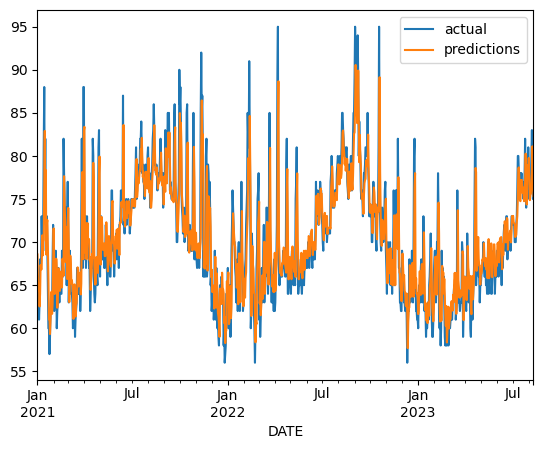

In [47]:
combined.plot()

In [48]:
reg.coef_

array([-1.67886238,  0.73719835,  0.1189022 ])

In [49]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [50]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [51]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.03,56,42,58.0,NaN
1960-01-02,0.00,58,38,59.0,NaN
1960-01-03,0.00,59,38,63.0,NaN
1960-01-04,0.00,63,45,63.0,NaN
1960-01-05,0.00,63,40,66.0,NaN
...,...,...,...,...,...
2023-08-06,0.00,77,65,80.0,76.733333
2023-08-07,0.00,80,64,83.0,77.066667
2023-08-08,0.00,83,69,78.0,77.433333


In [52]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [53]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [57]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [58]:
core_weather = core_weather.iloc[30:,:].copy()

In [59]:
error, combined = create_predictions(predictors, core_weather, reg)

In [60]:
error

2.682570313585827

<Axes: xlabel='DATE'>

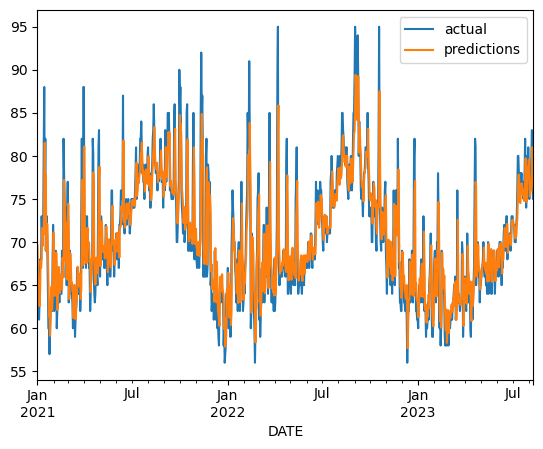

In [61]:
combined.plot()

In [64]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [65]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,63,48,63.0,63.700000,1.011111,1.312500,63.000000
1960-02-01,0.67,63,53,65.0,63.866667,1.013757,1.188679,63.000000
1960-02-02,0.03,65,53,63.0,64.066667,0.985641,1.226415,64.000000
1960-02-03,0.00,63,48,66.0,64.066667,1.016931,1.312500,63.666667
1960-02-04,0.01,66,53,65.0,64.166667,0.972222,1.245283,64.250000
...,...,...,...,...,...,...,...,...
2023-08-06,0.00,77,65,80.0,76.733333,0.996537,1.184615,77.397141
2023-08-07,0.00,80,64,83.0,77.066667,0.963333,1.250000,77.398469
2023-08-08,0.00,83,69,78.0,77.433333,0.932932,1.202899,77.401326


In [66]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [69]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [70]:
error, combined = create_predictions(predictors, core_weather, reg)

In [71]:
error

2.6485667717413337

In [72]:
reg.coef_

array([ -1.18342266,   0.38806725,   0.14243755,   0.29803601,
       -14.39318911,   5.72581066,   0.05704227,   0.11873997])

In [73]:
core_weather.corr()["target"]

precip            -0.202609
temp_max           0.823106
temp_min           0.583428
target             1.000000
month_max          0.641640
month_day_max     -0.492110
max_min            0.039662
monthly_avg        0.619752
day_of_year_avg    0.643598
Name: target, dtype: float64

In [74]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [75]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2021-03-30,88.0,67.085983,20.914017
2022-04-06,89.0,70.876232,18.123768
2022-10-18,95.0,78.840931,16.159069
2021-02-20,82.0,66.007912,15.992088
2022-04-08,70.0,85.687754,15.687754
